In [2]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

from archSpiral import *

c:\Users\Rebecca\anaconda3\envs\MLEnv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(658, 674, 3)


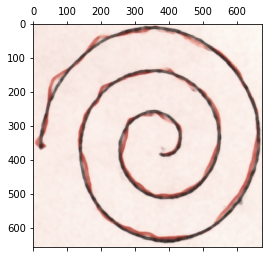

In [37]:
# read in the file
file = cv2.imread('C:/Users/Rebecca/Documents/Virginia_Tech/Research/git-repos/hand-tremor-detection/spiral-classifier/datasets/handPD_new/test/healthy/sp1-H1.jpg', 1)
# file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB)
print(np.shape(file))
# plt.matshow(file)
# plt.show()

# blur the image
fileBlur = cv2.blur(file, (5,5))
imgBlur = cv2.medianBlur(fileBlur, 11)

plt.matshow(imgBlur)
plt.show()

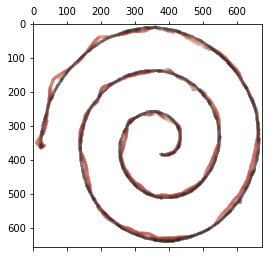

In [38]:
# iterate through all points in the image and threshold
nx = np.shape(imgBlur)[0]
ny = np.shape(imgBlur)[1]

for y in range(ny): # col
    for x in range(nx): # row
        color = imgBlur[x][y]
        if ((color[0] > 180) & (color[1] > 180) & (color[2] > 180)): # | (color[0] < 70):
            imgBlur[x][y][0] = 255
            imgBlur[x][y][1] = 255
            imgBlur[x][y][2] = 255

# temp = cv2.cvtColor(imgBlur, cv2.COLOR_BGR2RGB)
plt.matshow(imgBlur, cmap='gray')
plt.show()

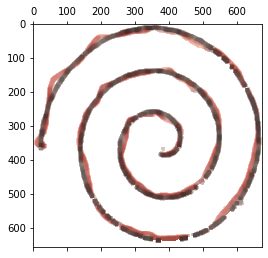

C:\Users\Rebecca\AppData\Local\Temp\ipykernel_17120\1377639513.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
  difGB = abs(color[1] - color[2])


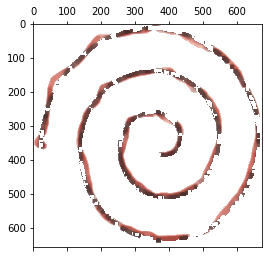

In [4]:
# perform erosion and dilation
dilation_size = 1
dilateElement = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*dilation_size+1,2*dilation_size+1), anchor=(dilation_size,dilation_size))
img = cv2.dilate(imgBlur, dilateElement)
img = cv2.dilate(img, dilateElement)

erosion_size = 2
erodeElement = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*erosion_size+1,2*erosion_size+1), anchor=(erosion_size,erosion_size))
img = cv2.erode(img, erodeElement)
img = cv2.erode(img, erodeElement)

plt.matshow(img)
plt.show()

for y in range(ny):
    for x in range(nx):
        color = img[x][y]
        difRG = abs(color[0] - color[1])
        difRB = abs(color[0] - color[2])
        difGB = abs(color[1] - color[2])

        if (difGB < 30) & (difRB < 30) & (difRG < 30):
            img[x][y][0] = 255
            img[x][y][1] = 255
            img[x][y][2] = 255

plt.matshow(img)
plt.show()

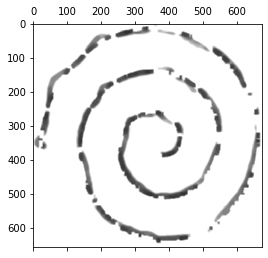

In [5]:
imgHT = cv2.dilate(img, erodeElement)
# imgHT = cv2.dilate(imgHT, erodeElement)

imgHT = cv2.erode(imgHT, erodeElement)
# imgHT = cv2.erode(imgHT, erodeElement)
# imgHT = cv2.erode(imgHT, erodeElement)

imgHT = cv2.blur(imgHT, (5,5))
imgHT = cv2.medianBlur(imgHT, 3)

imgHT_gray = cv2.cvtColor(imgHT, cv2.COLOR_BGR2GRAY)
imgHT = cv2.cvtColor(imgHT_gray, cv2.COLOR_GRAY2BGR)

# plt.matshow(imgHT_gray, cmap='gray')
plt.matshow(imgHT)
plt.show()

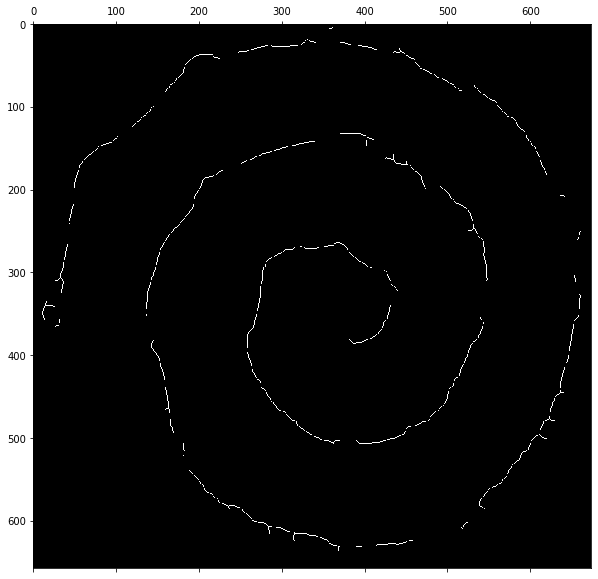

In [15]:
skel = skeletonize_imgs(imgHT_gray)

# plot
plt.figure(figsize=(10,10))
plt.matshow(skel, cmap='gray', fignum=1)

# cv2.imwrite('skelTest.png', skel)

In [39]:
# read in the file
file = cv2.imread('C:/Users/Rebecca/Documents/Virginia_Tech/Research/git-repos/hand-tremor-detection/spiral-classifier/datasets/handPD_new/test/healthy/sp1-H1.jpg', 1)
print(np.shape(file))
# plt.matshow(file)
# plt.show()

(658, 674, 3)


(658, 674, 3)


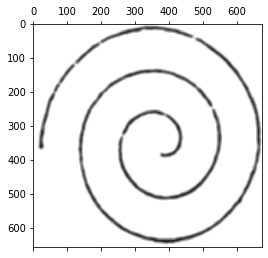

In [2]:
## extract template
# blur the image
# fileBlur = cv2.blur(file, (5,5))
# imgST = cv2.medianBlur(fileBlur, 11)
imgST = file
# plt.matshow(img)
# plt.show()

# iterate through all points in the image and threshold
nx = np.shape(imgST)[0]
ny = np.shape(imgST)[1]

for y in range(ny): # col
    for x in range(nx): # row
        color = imgST[x][y]
        if ((color[0] < 140) & (color[1] < 140) & (color[2] < 140)):
            imgST[x][y][0] = 20
            imgST[x][y][1] = 20
            imgST[x][y][2] = 20
        else:
            imgST[x][y][0] = 255
            imgST[x][y][1] = 255
            imgST[x][y][2] = 255

# plt.matshow(img)
# plt.show()

# perform erosion and dilation
dilation_size = 1
dilateElement = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*dilation_size+1,2*dilation_size+1), anchor=(dilation_size,dilation_size))
imgST = cv2.dilate(imgST, dilateElement)
imgST = cv2.dilate(imgST, dilateElement)

# plt.matshow(img)
# plt.show()

erosion_size = 2
erodeElement = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*erosion_size+1,2*erosion_size+1), anchor=(erosion_size,erosion_size))
imgST = cv2.erode(imgST, erodeElement)

# plt.matshow(img)
# plt.show()

imgST = cv2.blur(imgST, (10,10))
imgST = cv2.medianBlur(imgST, 3)

plt.matshow(imgST)
plt.show()


<Figure size 720x720 with 0 Axes>

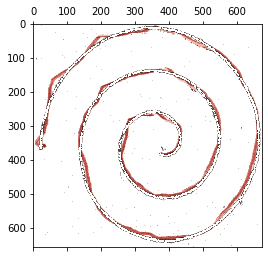

In [40]:
# blur the image
# fileBlur = cv2.blur(file, (5,5))
# img = cv2.medianBlur(fileBlur, 11)
img = file
# iterate through all points in the image and threshold
nx = np.shape(img)[0]
ny = np.shape(img)[1]

for y in range(ny): # col
    for x in range(nx): # row
        color = img[x][y]
        if ((color[0] > 200) & (color[1] > 200) & (color[2] > 200)) | (color[0] < 70):
            img[x][y][0] = 255
            img[x][y][1] = 255
            img[x][y][2] = 255
            
plt.figure(figsize=(10,10))
plt.matshow(img)
plt.show()

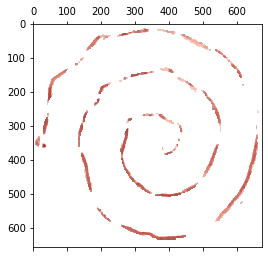

In [47]:
# try dilation
# perform erosion and dilation
dilation_size = 1
dilateElement = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*dilation_size+1,2*dilation_size+1), anchor=(dilation_size,dilation_size))
temp = cv2.dilate(img, dilateElement)
temp = cv2.dilate(temp, dilateElement)

# plt.matshow(temp)

erosion_size = 2
erodeElement = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*erosion_size+1,2*erosion_size+1), anchor=(erosion_size,erosion_size))
temp = cv2.erode(temp, erodeElement)
temp = cv2.erode(temp, erodeElement)
temp = cv2.dilate(temp, dilateElement)
temp = cv2.dilate(temp, dilateElement)

plt.matshow(temp)
# plt.show()

pause


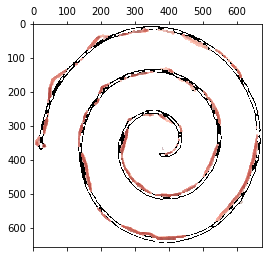

In [48]:
# try to fill in the gaps
for y in range(ny):
    for x in range(nx):
        if (x == 84) & (y == 155):
            print('pause')
        if (100 <= imgBlur[x][y][0] <= 200) & (240 <= temp[x][y][0] <= 255):
            temp[x][y][0] = 0
            temp[x][y][1] = 0
            temp[x][y][2] = 0

plt.matshow(temp)

(658, 674, 3)


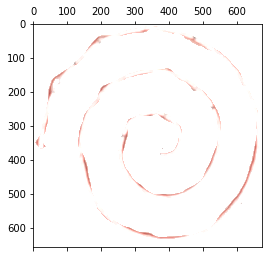

In [4]:
imgHT = cv2.subtract(imgST, img)
# imgHT = imgHT.astype(np.uint8)
print(np.shape(imgHT))
imgHT = cv2.bitwise_not(imgHT)

# imgHT = cv2.erode(imgHT, erodeElement)
imgHT = cv2.dilate(imgHT, erodeElement)
imgHT = cv2.erode(imgHT, erodeElement)
imgHT = cv2.dilate(imgHT, erodeElement)


plt.matshow(imgHT)

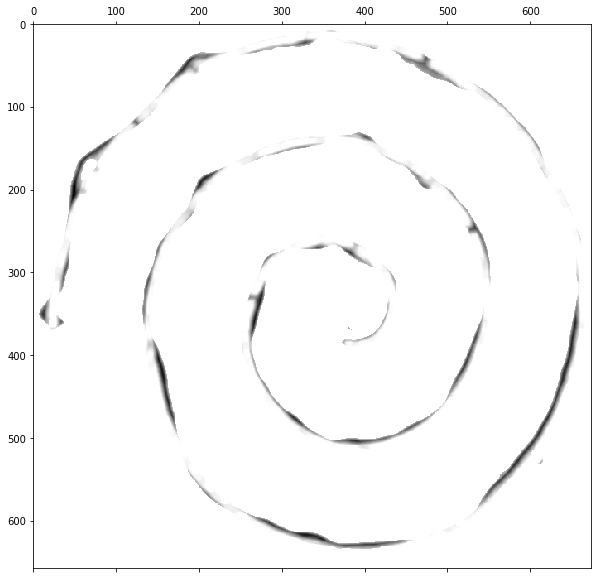

In [8]:
imgHT_gray = cv2.cvtColor(imgHT, cv2.COLOR_BGR2GRAY)
# skel = skeletonize_imgs(imgHT_gray)

# plot
plt.figure(figsize=(10,10))
plt.matshow(imgHT_gray, cmap='gray', fignum=1)

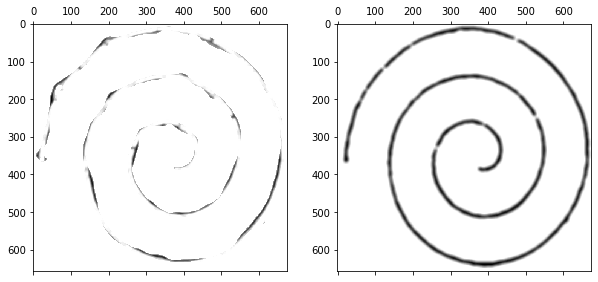

In [6]:
## fill in missing pixels
imgST_gray = cv2.cvtColor(imgST, cv2.COLOR_BGR2GRAY)
fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].matshow(imgHT_gray, cmap='gray')
axs[1].matshow(imgST_gray, cmap='gray')

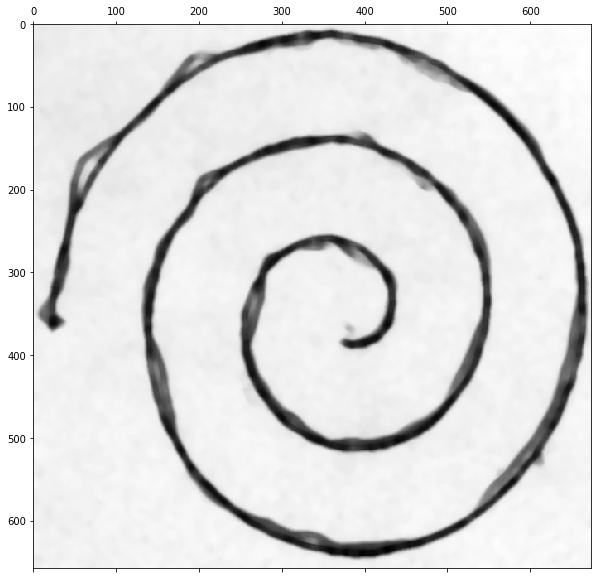

In [20]:
img_gray = cv2.cvtColor(imgBlur, cv2.COLOR_BGR2GRAY)
# skel = skeletonize_imgs(imgHT_gray)

plt.figure(figsize=(10,10))
plt.matshow(img_gray, cmap='gray', fignum=1)

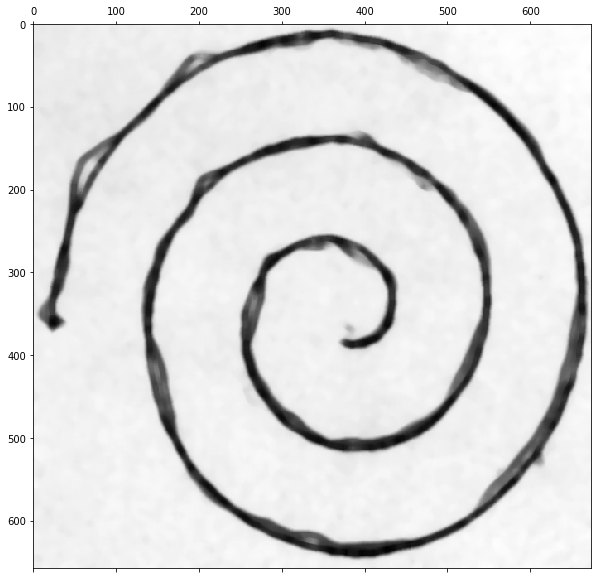

In [103]:
# extract just the red channel
rHT = imgBlur[:,:,1]
# rHT = cv2.dilate(rHT, dilateElement)
# rHT = cv2.dilate(rHT, dilateElement)
plt.figure(figsize=(10,10))
plt.matshow(rHT, cmap='gray', fignum=1)

## Starting over - look at red channel

(658, 674, 3)


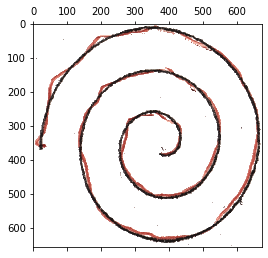

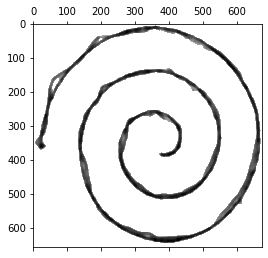

In [148]:
# read in the file
file = cv2.imread('C:/Users/Rebecca/Documents/Virginia_Tech/Research/git-repos/hand-tremor-detection/spiral-classifier/datasets/handPD_new/test/healthy/sp1-H1.jpg', 1)
# blur the image
fileBlur = cv2.blur(file, (5,5))
imgBlur = cv2.medianBlur(fileBlur, 11)
rHT = imgBlur[:,:,1]

print(np.shape(file))

origImg = file.copy()
# iterate through all points in the image and threshold
nx = np.shape(origImg)[0]
ny = np.shape(origImg)[1]

for y in range(ny): # col
    for x in range(nx): # row
        color = origImg[x][y]
        if ((color[0] > 180) & (color[1] > 180) & (color[2] > 180)): # | (color[0] < 70):
            origImg[x][y][0] = 255
            origImg[x][y][1] = 255
            origImg[x][y][2] = 255

for y in range(ny): # col
    for x in range(nx): # row
        color = rHT[x][y]
        if (color > 180):
            rHT[x][y] = 255
            rHT[x][y] = 255
            rHT[x][y] = 255

plt.matshow(origImg)
plt.matshow(rHT, cmap='gray')

#### extract the template

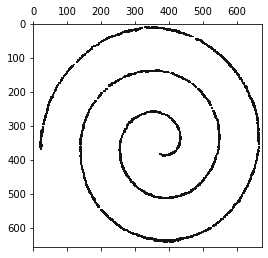

In [57]:
imgST = origImg.copy()

# iterate through all points in the image and threshold
nx = np.shape(imgST)[0]
ny = np.shape(imgST)[1]

for y in range(ny): # col
    for x in range(nx): # row
        color = imgST[x][y]
        if ((color[0] < 140) & (color[1] < 140) & (color[2] < 140)):
            imgST[x][y][0] = 20
            imgST[x][y][1] = 20
            imgST[x][y][2] = 20
        else:
            imgST[x][y][0] = 255
            imgST[x][y][1] = 255
            imgST[x][y][2] = 255

# perform erosion and dilation
dilation_size = 1
dilateElement = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*dilation_size+1,2*dilation_size+1), anchor=(dilation_size,dilation_size))
imgST = cv2.dilate(imgST, dilateElement)
imgST = cv2.dilate(imgST, dilateElement)

erosion_size = 2
erodeElement = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*erosion_size+1,2*erosion_size+1), anchor=(erosion_size,erosion_size))
imgST = cv2.erode(imgST, erodeElement)

# imgST = cv2.blur(imgST, (10,10))
# imgST = cv2.medianBlur(imgST, 3)

plt.matshow(imgST)
plt.show()

#### extract the hand-trace

<Figure size 720x720 with 0 Axes>

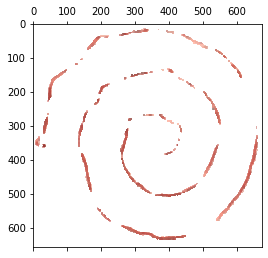

In [58]:
img = origImg.copy()
# iterate through all points in the image and threshold
nx = np.shape(img)[0]
ny = np.shape(img)[1]

for y in range(ny): # col
    for x in range(nx): # row
        color = img[x][y]
        if ((color[0] > 200) & (color[1] > 200) & (color[2] > 200)) | (color[0] < 70):
            img[x][y][0] = 255
            img[x][y][1] = 255
            img[x][y][2] = 255
            
# try dilation
# perform erosion and dilation
imgHT = cv2.dilate(img, dilateElement)
imgHT = cv2.dilate(imgHT, dilateElement)
imgHT = cv2.erode(imgHT, dilateElement)
imgHT = cv2.erode(imgHT, dilateElement)
# temp = cv2.dilate(temp, dilateElement)
# temp = cv2.dilate(temp, dilateElement)

plt.figure(figsize=(10,10))
plt.matshow(imgHT)

#### set condition to fill in blank pixels

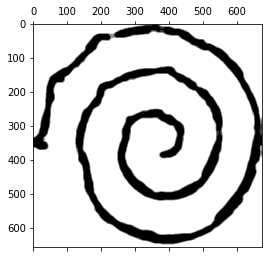

In [166]:
# iterate through all the pixels
# check on the red channel of the origImg
    # if on the red channel the pixels are below 70, then they are overlapping
    # also check if there are no pixels in the HT image
    # if all, then fill in pixels

completeHT = imgHT.copy()

for y in range(ny):
    for x in range(nx):
        if (65 <= rHT[x][y] <= 80) & (imgHT[x][y][2] == 255):
            completeHT[x][y][0] = 255
            completeHT[x][y][1] = 50
            completeHT[x][y][2] = 50

# completeHT = cv2.dilate(completeHT, dilateElement)
completeHT = cv2.erode(completeHT, erodeElement)
completeHT = cv2.erode(completeHT, erodeElement)
completeHT = cv2.dilate(completeHT, dilateElement)
completeHT = cv2.erode(completeHT, erodeElement)
completeHT = cv2.erode(completeHT, erodeElement)

# convert to grayscale
completeHT = cv2.cvtColor(completeHT, cv2.COLOR_BGR2GRAY)

for y in range(ny):
    for x in range(nx):
        if completeHT[x][y] != 255:
            completeHT[x][y] = 0

cHT_blur = cv2.blur(completeHT, (5,5))
cHT_blur = cv2.medianBlur(cHT_blur, 11)

completeHT = cv2.erode(cHT_blur, erodeElement)

completeHT = cv2.dilate(completeHT, erodeElement)
completeHT = cv2.dilate(completeHT, erodeElement)


plt.matshow(completeHT, cmap='gray')

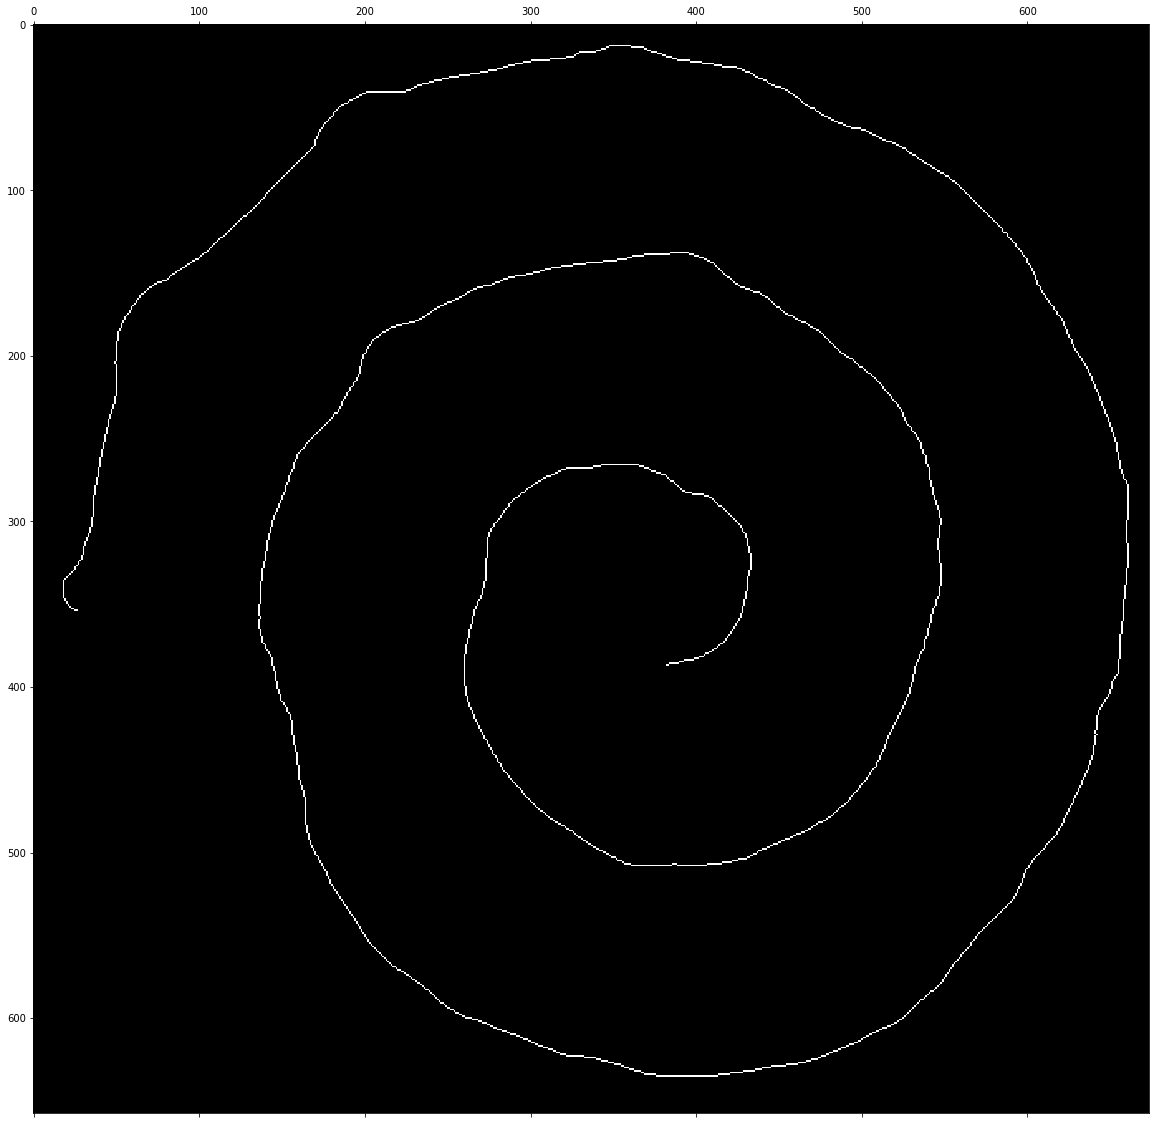

In [167]:
# skeletonize
from skimage.morphology import skeletonize, thin
normImg = completeHT / 255
normImg = 1 - normImg
# skel = skeletonize(normImg) * 255
thinned = thin(normImg, max_num_iter=200) * 255

# plot
plt.figure(figsize=(20,20))
plt.matshow(thinned, cmap='gray', fignum=1)

In [ ]:
from skimage.morphology import skeletonize
# normImg = completeHT / 255
# normImg = 1 - normImg
# skel = skeletonize(normImg) * 255